In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, assemble, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from math import pi, sqrt
sim = Aer.get_backend('aer_simulator')
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
from IPython.display import display, Math

ibmqfactory.load_account:WARNING:2022-05-27 14:51:22,672: Credentials are already in use. The existing account in the session will be replaced.


In [4]:
n = 3
qcdj = QuantumCircuit(n+1)
for i in range(n):
    qcdj.h(i)
qcdj.x(n)
qcdj.h(n)

In [6]:
def constant_oracle():
    global qcdj,n
    output = np.random.randint(2)
    if output == 1:
        qcdj.x(n)

In [8]:
def balanced_oracle():
    global qcdj,n
    s = "101"
    for q in range(len(s)):
        if s[q] == '1':
            qcdj.x(q)
    qcdj.barrier()
    for q in range(n):
        qcdj.cx(q,n)
    qcdj.barrier()
    for q in range(len(s)):
        if s[q] == '1':
            qcdj.x(q)

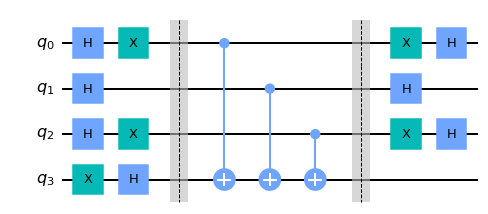

In [9]:
#Example of Deutsch-Jozsa algorithm (abbreviated as DJ algorithm) acting on a balanced oracle.
balanced_oracle()
for i in range(n):
    qcdj.h(i)

qcdj.draw()